In [6]:
import pandas as pd

import sqlite3
from sqlite3 import Error
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import std
import matplotlib as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict



In [7]:
df = pd.read_excel("ampa_wmt_rto_hackathon_july-22_data.xlsx", sheet_name=['animal_data','shelter_data'])
animal_data = df['animal_data']
shelter_data = df['shelter_data']

FileNotFoundError: [Errno 2] No such file or directory: 'ampa_wmt_rto_hackathon_july-22_data.xlsx'

In [ ]:
animal_data

NameError: name 'animal_data' is not defined

## understanding Animal Data 

In [ ]:
animal_data.columns

In [ ]:
dt = animal_data[['shelter_id','Species','distance_miles']]

In [ ]:
dt

<Figure size 1152x2160 with 0 Axes>

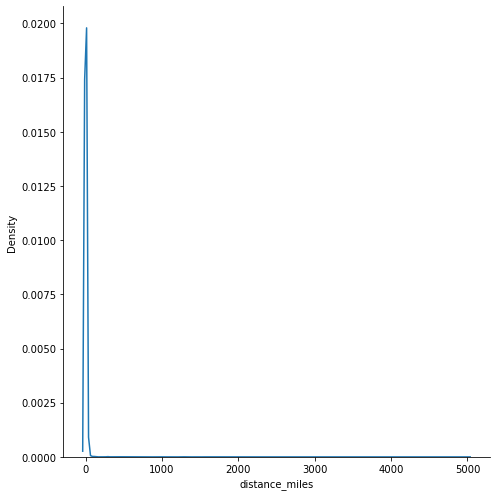

In [ ]:
plt.figure(figsize=(16, 30))
g = sns.displot(data=dt, x="distance_miles", kind= "kde", height = 7)

most of the animals were found close to the outcome address and were able to be returned 

In [ ]:
dt['shelter_id'].unique()

In [ ]:
keys = [1,2,3,4,5,6,7,8,9,10,11]
x = dict(zip(dt['shelter_id'].unique(), keys))
x

{'Rochester': 1,
 'Oakland': 2,
 'Fresno': 3,
 'Mcallen': 4,
 'Tucson': 5,
 'Madera': 6,
 'Las Vegas': 7,
 'Dallas': 8,
 'San Diego': 9,
 'Pasco': 10,
 'Atlanta': 11}

In [9]:
dt2=dt.replace({"shelter_id": x})

NameError: name 'dt' is not defined

In [ ]:
dt2

In [ ]:
dt['Species'].unique()

In [8]:
dt2.loc[dt2['Species'] == "DOG", "Species"] = 'Dog'

NameError: name 'dt2' is not defined

In [ ]:
dt2['Species'].unique()

In [ ]:
dt2['Species'].nunique()

In [ ]:
dt2.nunique()

In [ ]:
keys2 = [101,102,103,104,105,106,100,107]
y = dict(zip(dt2['Species'].unique(), keys2))
y

{'Dog': 101,
 'Cat': 102,
 'Pet Reptile': 103,
 'Pig': 104,
 'Horse': 105,
 'Rabbit': 106,
 nan: 100,
 'Other': 107}

In [ ]:
dt3=dt2.replace({"Species": y})

In [ ]:
dt3['Species'].unique()

In [ ]:
dt3.info()

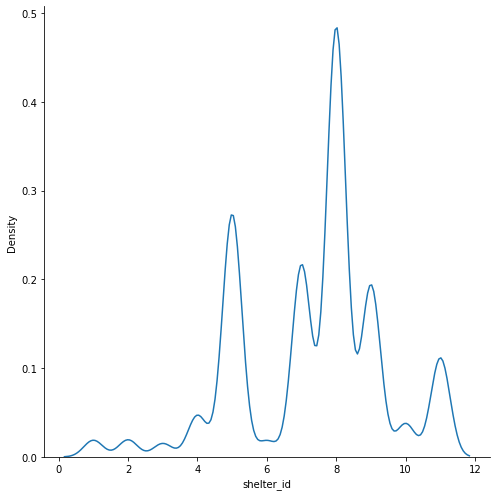

In [ ]:
sns.displot(data=dt3,  x="shelter_id", kind="kde",height = 7)

denisity of most animals are at shlter id 8 being dallas 

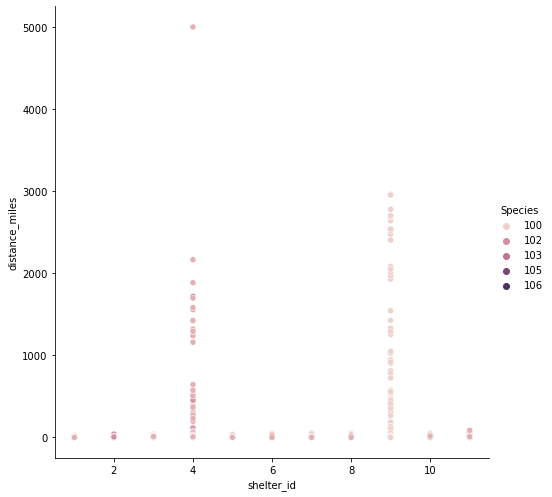

In [ ]:
ax = sns.relplot(data=dt3, x="shelter_id", y="distance_miles",hue = "Species",height = 7)
g.ax.axline(xy1=(10, 10), slope=.2, color="b", dashes=(5, 2))

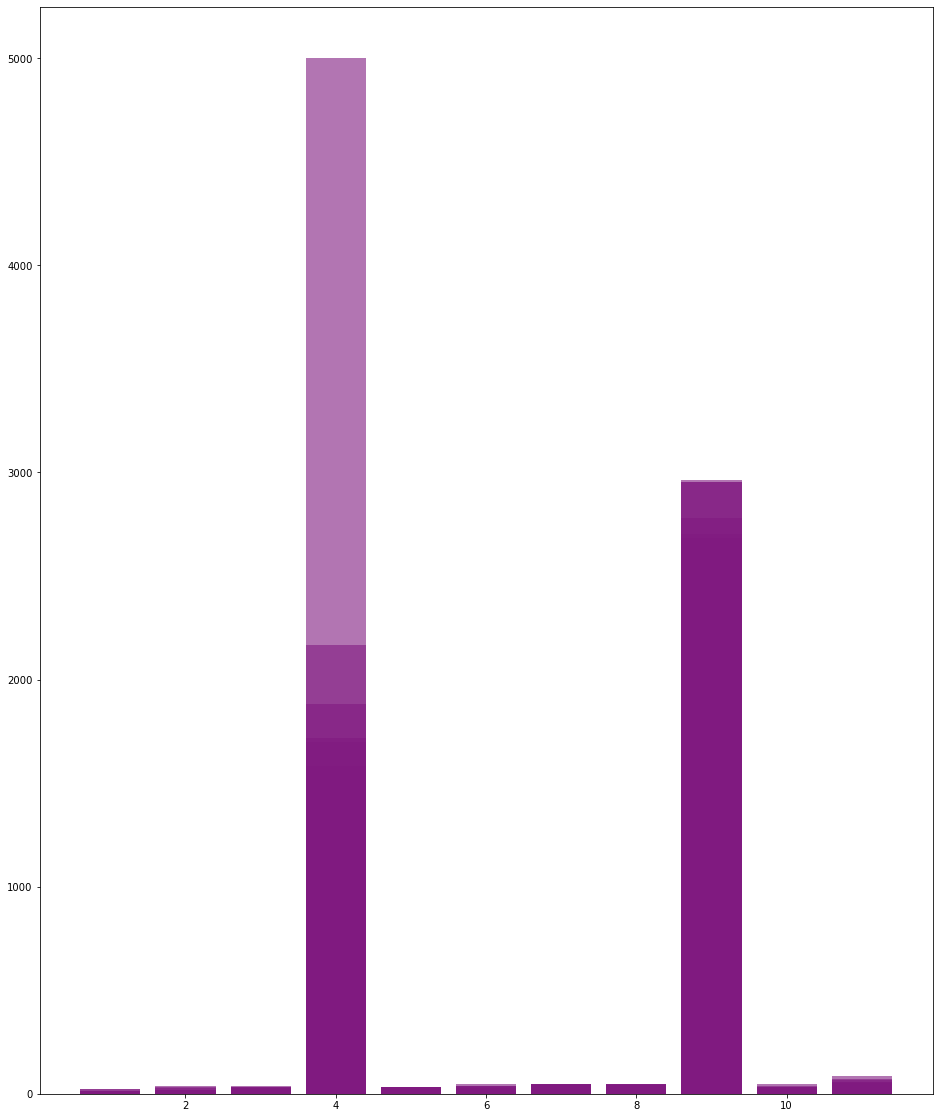

In [ ]:
plt.figure(figsize=(16, 20))
plt.bar(dt3.shelter_id, dt3.distance_miles, color = (0.5,0.1,0.5,0.6))
plt.show()

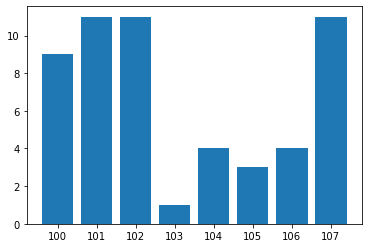

In [ ]:

plt.bar(dt3.Species, dt3.shelter_id,)
plt.show()

## understanding shelter Data 

In [ ]:
shelter_data = df['shelter_data']

In [ ]:
shelter_data

shelter_id  annual_intake_2019  annual_intake_2020  annual_intake_2021  \
0   Rochester                3867              2732.0              2677.0   
1     Oakland                6188              5234.0              7613.0   
2      Fresno                8001              6246.0              6634.0   
3     Mcallen               21815             15511.0             15283.0   
4      Tucson               27064             17547.0             23940.0   
5      Madera                5166                 NaN                 NaN   
6   Las Vegas               27922             17957.0                 NaN   
7      Dallas               40155             19594.0             18533.0   
8   San Diego               33555             31871.0             30803.0   
9       Pasco                9906             11370.0              6510.0   
10    Atlanta                8288              7062.0              8302.0   

    jurisdiction_size_sq_km justidiction_state jurisdiction_region  \
0                      3541                 NY       Monroe County   
1                      1914                 CA      Alameda County   
2                     15568                 CA       Fresno County   
3                      4100                 TX      Hidalgo County   
4                     23799                 AZ         Pima County   
5                      5576                 CA       Madera County   
6                     20878                 NV        Clark County   
7                      1992                 TX         Dallas City   
8                     11036                 TX    San Diego County   
9                      2250                 FL        Pasco County   
10                      702                 GA       Dekalb County   

    jurisdiction_pop_size  jurisdiction_pop_density_person_per_sq_km  
0                  741770                                 209.480373  
1                 1682353                                 878.972309  
2                  999101                                  64.176580  
3                  868707                                 211.879756  
4                 1043433                                  43.843565  
5                  156255                                  28.022776  
6                 2265461                                 108.509484  
7                 1304379                                 654.808735  
8                 3338000                                 302.464661  
9                  553947                                 246.198667  
10                 764382                                1088.863248

In [ ]:
dfnew = shelter_data[['shelter_id','annual_intake_2019','annual_intake_2020','annual_intake_2021']]

<AxesSubplot:xlabel='shelter_id'>

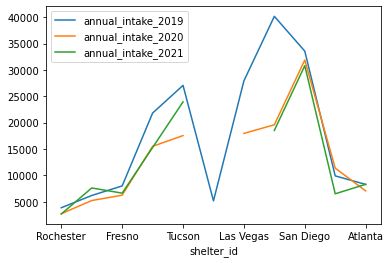

In [ ]:
dfnew.set_index('shelter_id').plot()

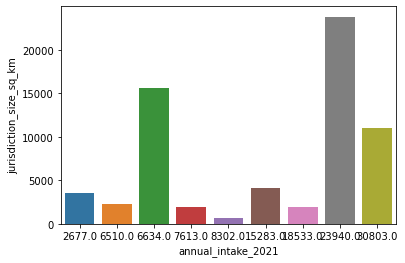

In [ ]:
ax = sns.barplot(data=shelter_data, x = 'annual_intake_2021'  , y = 'jurisdiction_size_sq_km')

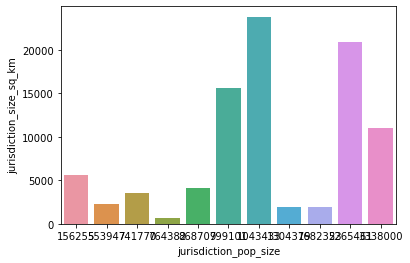

In [ ]:
ax = sns.barplot(data=shelter_data, x = 'jurisdiction_pop_size'  , y = 'jurisdiction_size_sq_km')

## observations from graphs 

from the above graphs we understand 
- shelter in dallas tho less in size compared to other shlters has more density of animal intake and has increased this intake stedily over the years . 
- Dallas shelter has the highest size/pop ratio helping with the animal adoptation number 
- Most number of species in the shelters are dogs and cats  

In [ ]:
ax1=animal_data.replace({"shelter_id": x})
ax1 = ax1.replace({"Species": y})
mask3 = (((ax1['shelter_id'] == 7)))
dt4 = ax1[mask3][['shelter_id', 'intake_date', 'Species', 'found_lng', 'found_lat',
       'outcome_lng', 'outcome_lat', 'distance_miles', 'found_address',
       'outcome_address']]

In [ ]:
dt4

In [ ]:
dt4['intake_date'].nunique()
# plt.bar(dt4.intake_date,height = 7)
# plt.show()

In [ ]:
dt4['month'] = pd. DatetimeIndex(dt4['intake_date']). month

In [ ]:
dt4

In [ ]:
dt4['counts'] = dt4.month.map(dt4.month.value_counts())

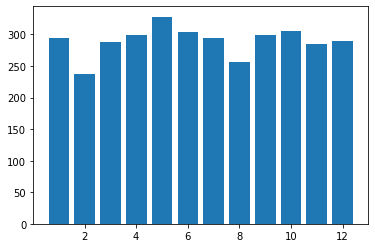

In [ ]:
plt.bar(dt4.month,dt4.counts)
plt.show()
## we understand nothing about the intake patters from below 

In [ ]:
dt4

In [ ]:
import folium

In [ ]:
outcome_loc = [dt4['outcome_lat'].mean(), dt4['outcome_lng'].mean()]
outcome_map = folium.Map(location = outcome_loc, tiles="Openstreetmap", zoom_start = 5, control_scale=True)
for index, loc in dt4.iterrows():
    folium.CircleMarker([loc['outcome_lat'], loc['outcome_lng']], radius=2, weight=5,color="red").add_to(outcome_map)
folium.LayerControl().add_to(outcome_map)
outcome_map

In [ ]:
found_loc = [dt4['found_lat'].mean(), dt4['found_lng'].mean()]
map1 = folium.Map(location = found_loc, tiles='Openstreetmap', zoom_start = 5, control_scale=True)
for index, loc in dt4.iterrows():
    folium.CircleMarker([loc['found_lat'], loc['found_lng']], radius=2, weight=5).add_to(map1)
folium.LayerControl().add_to(map1)
map1

## observations from maps 
animals are found very rarley on a freeeway where are hugh ways and main roads have 1:5 chance of spotting an animal to be found from the surrounding houses 

In [ ]:
animal_data1 = animal_data.dropna()

In [ ]:
found_loc_all = [animal_data1['found_lat'].mean(), animal_data1['found_lng'].mean()]
map_all = folium.Map(location = found_loc, tiles='Openstreetmap', zoom_start = 5, control_scale=True)
for index, loc in animal_data1.iterrows():
    folium.CircleMarker([loc['found_lat'], loc['found_lng']], radius=2, weight=5).add_to(map_all)
folium.LayerControl().add_to(map_all)
map_all

In [ ]:
# outcome_loc_all = [animal_data1['outcome_lat'].mean(), animal_data1['outcome_lng'].mean()]
# outcome_map = folium.Map(location = outcome_loc_all, tiles="Stamen Toner", zoom_start = 5, control_scale=True)
# for index, loc in animal_data1.iterrows():
#     folium.CircleMarker([loc['outcome_lat'], loc['outcome_lng']], radius=2, weight=5,color="red").add_to(outcome_map)
# folium.LayerControl().add_to(outcome_map)
# outcome_map